# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Helper Functions

In [ ]:
def conversion_rate(dataframe, column_names = None):
  
  """Determine conversion rates either by groups or wrt the whole dataframe"""

  #Conversion Rate by groups listed in 'column_names'
  if column_names is not None:

    # Total number of converted users
    column_conv = dataframe[dataframe.converted].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names).user_id.nunique()
    
    conversion_rate = column_conv/column_total
    conversion_rate = conversion_rate.fillna(0)

    return conversion_rate
  
  else:
    
    total = dataframe.user_id.nunique()
    subscribers = dataframe[dataframe.converted]['user_id'].nunique()

    return subscribers/total

In [ ]:
def retention_rate(dataframe, column_names = None):

  """Determine retention rates either by groups or wrt the whole dataframe"""


  #Conversion Rate by groups listed in 'column_names'
  if column_names is not None:

    # Total number of converted users
    column_retained = dataframe[dataframe.is_retained].groupby(column_names)['user_id'].nunique()

    # Total number subscribers
    column_subscribers = dataframe[dataframe.converted].groupby(column_names).user_id.nunique()
    
    retention_rate = (column_retained/column_subscribers).fillna(0)

    return retention_rate
  
  else:
    
    sub = data[data.converted].user_id.nunique()
    ret = data[data.is_retained]['user_id'].nunique()
    
    return ret/sub

In [ ]:
def plotting_conv(dataframe):
    for column in dataframe:
        mask = np.isfinite(dataframe[column])
        x = dataframe.index[mask]
        y = dataframe.loc[mask,column]

        # Plot column by dataframe's index
        plt.plot(,)
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()  
        plt.clf()

# Data

In [ ]:
data = pd.read_csv("./Data/marketing_channels.csv",index_col=0,parse_dates=['date_served','date_subscribed','date_canceled'])

## Quick Look

In [ ]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
 12  DoW                  1856 non-null   float64       
 13  channel_code         1856 non-n

In [ ]:
data.shape

(10037, 15)

The data consists of 10037 records relating to a companies marketing efforts and consumer subscriptions in the month of January 2018. Subscrictions were then continually tracked through roughly the beginning of May.

In [ ]:
dates_cols = data.select_dtypes(include='datetime')
dates_cols.agg(['min','max'],).T.rename({'min':'Earlist','max':'Latest'},axis=1)

,Earlist,Latest
date_served,2018-01-01,2018-01-31
date_subscribed,2018-01-01,2018-01-31
date_canceled,2018-01-05,2018-05-09


Some individuals were reached out too more than once. Additionally, some were marketed to across multiple channels and given both personalized and non-personalized variants. 

In [ ]:
print(f"Number of individuals: {data.user_id.nunique()}")

Number of individuals: 7309


In [ ]:
temp = data.groupby(["user_id","marketing_channel"]).size()
temp[temp.index.get_level_values(0).duplicated(keep=False)]

user_id     marketing_channel
a100000051  House Ads            1
            Push                 1
a100000055  House Ads            1
            Push                 1
a100000056  Facebook             1
                                ..
a100006806  Instagram            1
a100006808  Facebook             1
            Push                 1
a100006809  House Ads            1
            Instagram            1
Length: 3321, dtype: int64

In [ ]:
temp = data.groupby(["user_id","variant"]).size()
temp[temp.index.get_level_values(0).duplicated(keep=False)]

user_id     variant        
a100000784  control            1
            personalization    1
a100000788  control            1
            personalization    1
a100000792  control            1
                              ..
a100005979  personalization    1
a100005980  control            1
            personalization    1
a100005981  control            1
            personalization    1
Length: 998, dtype: int64

The various channels,age groups, and languages served and prefered are shown below.

In [ ]:
for col in ["marketing_channel","age_group","language_preferred","language_displayed"]:
  print(data[col].value_counts())
  print("\n")

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64


19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
45-55 years    1353
36-45 years    1353
55+ years      1187
Name: age_group, dtype: int64


English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64


English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64




Note: DoW ->  Day of the Week when customer subscribed

## Data Cleaning

1. Remove records with missing channels or serve date
2. Drop channel code because its redundant
3. Encode DoW as int

In [ ]:
data.dropna(subset=['marketing_channel','date_served'],inplace=True)
data.drop('channel_code',axis=1, inplace=True)
data.DoW = data.DoW.apply(lambda x: int(x) if str(x).isdigit() else x)

In [ ]:
corrupted_index = data[(data.converted == False) & (data.is_retained == True)].index
data.loc[corrupted_index,"is_retained"] = False

# Preliminary EDA

**Distribution of marketing channels and variants**

In [ ]:
dist = data.groupby(['marketing_channel', 'variant']).size().unstack()
dist

variant,control,personalization
marketing_channel,,
Email,274,291
Facebook,894,966
House Ads,2552,2181
Instagram,888,983
Push,468,525


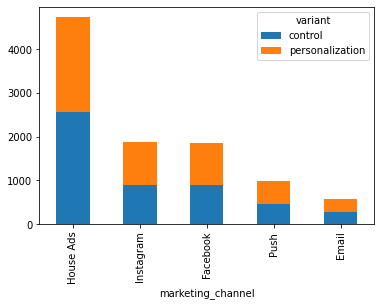

In [ ]:
sort_list = dist.sum(axis=1).sort_values(ascending=False).index
ax = dist.reindex(sort_list).plot.bar(stacked=True)

There is roughly equal distribution across variants for each marketing channel, which is important in constructing AB test for a group.

**Observe the number of unique users served ads during the month**

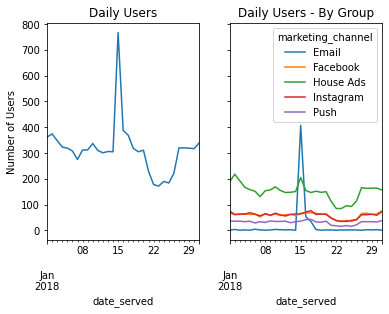

In [ ]:
# Total Served and Total by group
daily_users = data.groupby(['date_served'])['user_id'].nunique()
daily_by_group = data.groupby(['date_served','marketing_channel'])['user_id'].nunique().unstack()

#Create Plot
fig, (ax1,ax2) = plt.subplots(1,2,sharex=True,sharey=True)

daily_users.plot(ax=ax1)
ax1.set_title('Daily Users')
ax1.set_ylabel('Number of Users')

daily_by_group.plot(ax=ax2)
ax2.set_title('Daily Users - By Group');

Clearly, the spike in users served ads is the result of an Email Campaign around the 15th of January

**Channel Distribution by Age**

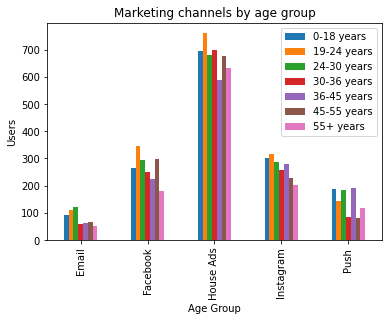

In [ ]:
channel_age = data.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values);


Only noticeable trend is that email and instagram not reaching older age groups

# Conversion and Rentention Rates

Want to observe:

1. **Converstion Rate**: Of all people that came into contact with campaign, how many bought product

2. **Retetion Rate:** If the user subscribed, are they still a subscriber 



In [ ]:
print(f"The Total Conversion Rate is {round(conversion_rate(data),2)}% and of these customers, {round(retention_rate(data),2)}% remained by the middle of May")

The Total Conversion Rate is 0.14% and of these customers, 0.67% remained by the middle of May


In [ ]:
subs_gained =  data.groupby('date_subscribed').size().rename('subs_gained')
subs_gained.index.rename('date',inplace=True)

subs_lost = -data.groupby('date_canceled').size().rename('subs_lost')
subs_lost.index.rename('date',inplace=True)

df = pd.merge(subs_gained,subs_lost,on='date',how='outer').fillna(0)
df['current_subs'] = (df.subs_gained+df.subs_lost).cumsum()
df['total_lost'] = -df.subs_lost.cumsum()

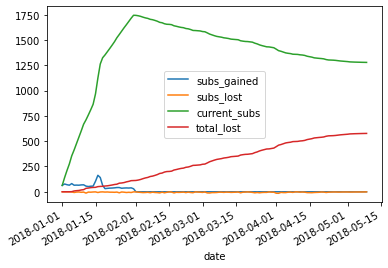

In [ ]:
df.plot();

So, by the end of marketing effort, they were able to secure around 1900 subscriptions and by the end of may, kept close to 1300.

## Customer Segmentation

Want to get a more granular level look on conversion rates

**Look at Conversion Rates by Language**

In [ ]:
# Group by language_displayed and count unique users
language_conversion_rate = conversion_rate(data,column_names=['language_displayed'])

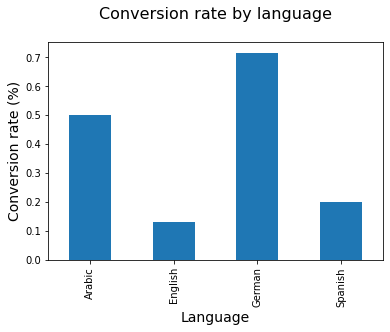

In [ ]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind='bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14);

**Observe Retentional Total by Date Subscribed and Channel**

Look at what percentage of users who subscribed on a given date using a specific channel are still subscribed

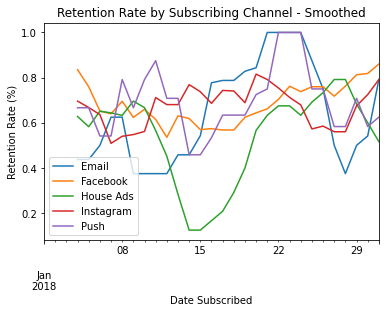

In [ ]:
retention_rate_df = retention_rate(data,column_names = ['date_subscribed','subscribing_channel']).unstack()

# Plot retention rate
retention_rate_df.ffill().rolling(window = 4).mean().plot()


# Add a title, x-label, y-label, legend and display the plot
plt.title("Retention Rate by Subscribing Channel - Smoothed")
plt.xlabel("Date Subscribed")
plt.ylabel("Retention Rate (%)")
plt.legend(loc='lower left',labels=retention_rate_df.columns)
plt.show();

# Conversion Attribution

As can be seen in the segmented analysis above, the English conversion rates are low and the House Ads take a steep dip around the 15th. 

This problem occured because non-english speaking customers where given English ads. 

Further analysis should determine the impact of this. For now, I will just remove these records from the data



In [ ]:
cond = (data.language_preferred != 'English') & (data.marketing_channel == 'House Ads')
non_english = data[cond]

non_english.is_correct_lang.map({'Yes':1,'No':0}).mean()

0.2721417069243156

In [ ]:
non_english.is_correct_lang.map({'Yes':1,'No':0}).mean()

0.2721417069243156

# Final Data to Perform AB

Remove customers who were given the wrong language

In [ ]:
idx = non_english.is_correct_lang.map({'Yes':1,'No':0})
idx = idx[idx==1]
idx = idx.index

In [ ]:
data = data.loc[data.index.difference(idx)]

In [ ]:
data.to_csv("/content/drive/MyDrive/Colab_Notebooks/Projects/AB_Test_Email/data_cleaned.csv")